# Movie Genre Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
#models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

### import training data


In [3]:
df_train=pd.read_csv("Genre Classification Dataset/train_data.txt",sep=":::",names=["Title","Genre","Description"])
df_train

C:\Users\dell\AppData\Local\Temp\ipykernel_9424\3079241456.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train=pd.read_csv("Genre Classification Dataset/train_data.txt",sep=":::",names=["Title","Genre","Description"])


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
df_train.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

### Number of movies in each Genre


In [6]:
movie_class=df_train["Genre"].value_counts()
print(movie_class)

Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64


### Plotting no. of movies in each genre

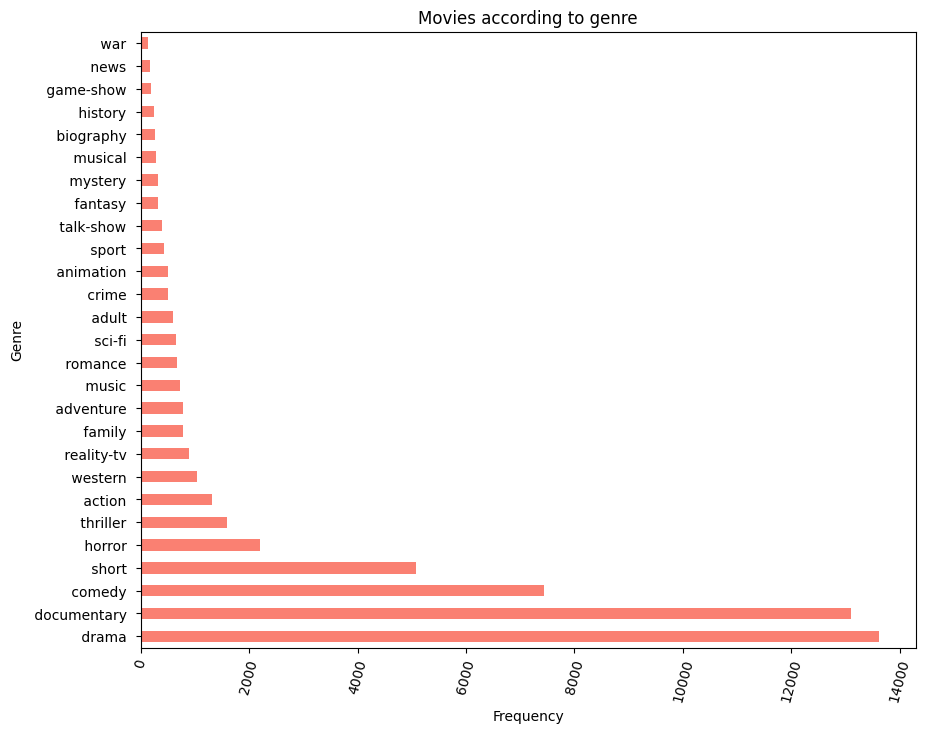

In [7]:
plt.figure(figsize=(10, 8))
movie_class.plot(kind='barh', color='salmon')
plt.title('Movies according to genre')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.xticks(rotation=75)
plt.show()

### import test data

In [8]:
df_test=pd.read_csv("Genre Classification Dataset/test_data.txt",sep=":::",names=["ID","Title","Description"])
df_test

C:\Users\dell\AppData\Local\Temp\ipykernel_9424\4236969570.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test=pd.read_csv("Genre Classification Dataset/test_data.txt",sep=":::",names=["ID","Title","Description"])


,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [10]:
df_test.isnull().sum()

ID             0
Title          0
Description    0
dtype: int64

### Modelling

In [11]:
# split data into x and y
tfidf_vectorizer=TfidfVectorizer(max_features=5000)
X=tfidf_vectorizer.fit_transform(df_train['Description'])
Y=df_train['Genre']
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [12]:
X_train

<43371x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2458705 stored elements in Compressed Sparse Row format>

In [13]:
Y

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
54210          comedy 
54211          horror 
54212     documentary 
54213          comedy 
54214         history 
Name: Genre, Length: 54214, dtype: object

### trying logistic regression

In [14]:
#set random seeds
np.random.seed(42)
model=LogisticRegression()
#fit the model to the data
model.fit(X_train,Y_train)
#evaluate the model and append its score to model_Scores
model.score(X_test,Y_test)

C:\Users\dell\Desktop\ML\Movie-genre\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5905192289956654

In [15]:
Y_pred=model.predict(X_train)
Y_pred

array([' drama ', ' drama ', ' documentary ', ..., ' drama ', ' drama ',
       ' documentary '], dtype=object)

In [16]:
print("Accuracy on training set:", accuracy_score(Y_train, Y_pred))
print("Classification Report on training set:\n", classification_report(Y_train,Y_pred) )

Accuracy on training set: 0.666297756565447


C:\Users\dell\Desktop\ML\Movie-genre\.env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\Desktop\ML\Movie-genre\.env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report on training set:
                precision    recall  f1-score   support

      action        0.65      0.39      0.49      1052
       adult        0.83      0.38      0.52       478
   adventure        0.77      0.25      0.38       636
   animation        0.82      0.15      0.25       394
   biography        0.00      0.00      0.00       204
      comedy        0.63      0.70      0.66      6004
       crime        0.55      0.09      0.15       398
 documentary        0.71      0.91      0.80     10437
       drama        0.61      0.84      0.71     10916
      family        0.71      0.17      0.27       634
     fantasy        1.00      0.02      0.05       249
   game-show        0.90      0.60      0.72       154
     history        1.00      0.01      0.01       198
      horror        0.76      0.70      0.73      1773
       music        0.80      0.54      0.65       587
     musical        0.72      0.06      0.11       227
     mystery        1.00

C:\Users\dell\Desktop\ML\Movie-genre\.env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Predictions

In [17]:
test_data=tfidf_vectorizer.fit_transform(df_test['Description'])

In [18]:
X_test_predictions=model.predict(test_data)
df_test['Predicted_Genre']=X_test_predictions

In [19]:
df_test.to_csv('predicted_genres.csv', index=False)
print(df_test)

          ID                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description Predicted_Genre  
0       L.R. Brane loves his life - his car, his apar...          drama   
1       Spain, March 1964: Quico is a very naughty ch...          drama   
2       One year in the life of Albin and his family ...          drama   
3       His father has died, he hasn't spoken with hi...    documentary   
4       Before he was kn

### model pickeling

In [20]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Models pickled successfully.")

Models pickled successfully.


### trying naive bayes

In [21]:
#set random seeds
np.random.seed(42)
model1=MultinomialNB()
#fit the model to the data
model1.fit(X_train,Y_train)
#evaluate the model and append its score to model_Scores
model1.score(X_test,Y_test)

0.5120354145531679

In [22]:
Y_pred1=model1.predict(X_train)
Y_pred1

array([' short ', ' drama ', ' documentary ', ..., ' drama ', ' comedy ',
       ' documentary '], dtype='<U13')

In [23]:
print("Accuracy on training set:", accuracy_score(Y_train, Y_pred1))
print("Classification Report on training set:\n", classification_report(Y_train,Y_pred1) )

Accuracy on training set: 0.5315533420949482


C:\Users\dell\Desktop\ML\Movie-genre\.env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\Desktop\ML\Movie-genre\.env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report on training set:
                precision    recall  f1-score   support

      action        0.75      0.06      0.11      1052
       adult        0.92      0.03      0.05       478
   adventure        0.84      0.05      0.09       636
   animation        0.00      0.00      0.00       394
   biography        0.00      0.00      0.00       204
      comedy        0.56      0.45      0.50      6004
       crime        0.00      0.00      0.00       398
 documentary        0.57      0.90      0.70     10437
       drama        0.46      0.84      0.59     10916
      family        1.00      0.00      0.00       634
     fantasy        0.00      0.00      0.00       249
   game-show        1.00      0.06      0.12       154
     history        0.00      0.00      0.00       198
      horror        0.80      0.33      0.47      1773
       music        0.94      0.11      0.20       587
     musical        0.00      0.00      0.00       227
     mystery        0.00

C:\Users\dell\Desktop\ML\Movie-genre\.env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Predictions

In [24]:
X_test_predictions1=model1.predict(test_data)
df_test['Predicted_Genre']=X_test_predictions1

In [25]:
df_test.to_csv('predicted_genres1.csv', index=False)
print(df_test)

          ID                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description Predicted_Genre  
0       L.R. Brane loves his life - his car, his apar...          drama   
1       Spain, March 1964: Quico is a very naughty ch...        romance   
2       One year in the life of Albin and his family ...    documentary   
3       His father has died, he hasn't spoken with hi...    documentary   
4       Before he was kn

### Model Pickeling

In [26]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)
with open('model1.pkl', 'wb') as file:
    pickle.dump(model1, file)
print("Models pickled successfully.")

Models pickled successfully.
